# An illustration of the result that $\left(dW_t\right)^2=dt$

In class, we showed that $\left(dW_t\right)^2=dt$, or, in ingegral form,
$$
    \int_{0}^t\left(dW_s\right)^2=t.
$$
Let's examine this important result numericaly.

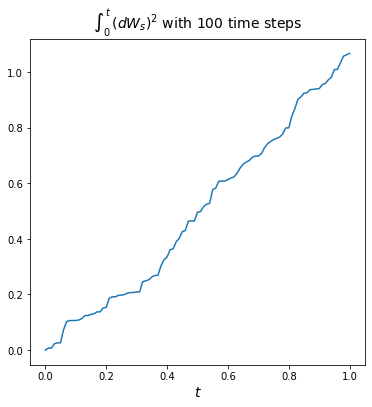

In [5]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def integral_dW_squared(T, timesteps):
    dt = T/timesteps
    time = np.linspace(0, T, timesteps + 1)
    
    # random.normal takes standard deviation, not variance
    dW = np.random.normal(0, math.sqrt(dt), timesteps)

    return time, np.insert(np.cumsum(dW**2), 0, 0)

timesteps = 100

plt.figure(figsize = (6,6))
plt.title('$\int_0^t\,(dW_s)^2$ with {} time steps'.format(timesteps), fontsize = 14)
plt.xlabel('$t$', fontsize = 14)

plt.plot(*integral_dW_squared(T = 1, timesteps = timesteps))

plt.show()

What if we increase the number of number of time steps?

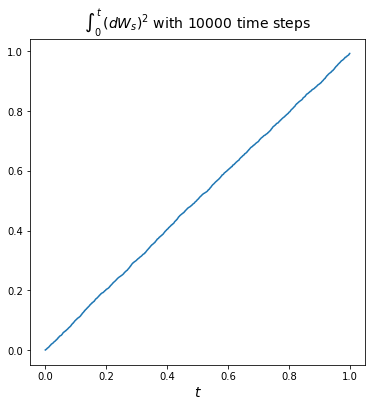

In [4]:
timesteps = 10000

plt.figure(figsize = (6,6))
plt.title('$\int_0^t\,(dW_s)^2$ with {} time steps'.format(timesteps), fontsize = 14)
plt.xlabel('$t$', fontsize = 14)

plt.plot(*integral_dW_squared(T = 1, timesteps = timesteps))

plt.show()

# The Newtonian case

Let's choose a Newtonian function that (just for fun) reminds us of a Wiener process, say $f_t=\sqrt{t}\sin(t)$:

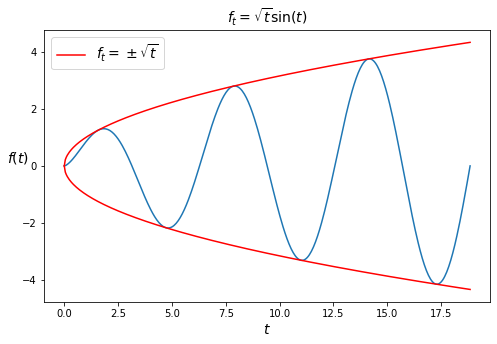

In [6]:
plt.figure(figsize = (8,5))
plt.title('$f_t=\sqrt{t}\sin(t)$', fontsize = 14)
plt.xlabel('$t$', fontsize = 14)
plt.ylabel('$f(t)$', fontsize = 14, rotation = 0)

def f(t):
    return np.sqrt(t)*np.sin(t)

t = np.linspace(0, 6*math.pi, 400)
u_bound = np.sqrt(t)
l_bound = -np.sqrt(t)

plt.plot(t, f(t))
plt.plot(t, u_bound, 'r', label='$f_t=\pm\sqrt{t}$')
plt.plot(t, l_bound, 'r')

plt.legend(fontsize = 14)
plt.show()

What happens when we sum up squared increments?

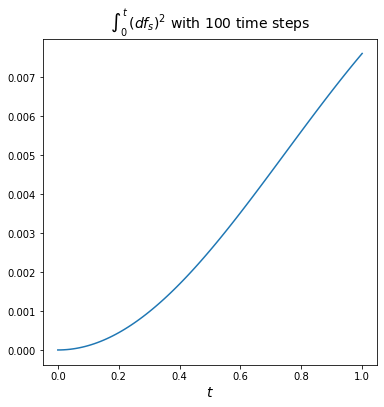

In [9]:
def integral_df_squared(T, timesteps):
    time = np.linspace(0, T, timesteps + 1)
    
    df = np.diff(f(time))

    return time, np.insert(np.cumsum(df**2), 0, 0)

timesteps = 100

plt.figure(figsize = (6,6))
plt.title('$\int_0^t\,(df_s)^2$ with {} time steps'.format(timesteps), fontsize = 14)
plt.xlabel('$t$', fontsize = 14)

plt.plot(*integral_df_squared(T = 1, timesteps = timesteps))

plt.show()

And with more time steps?

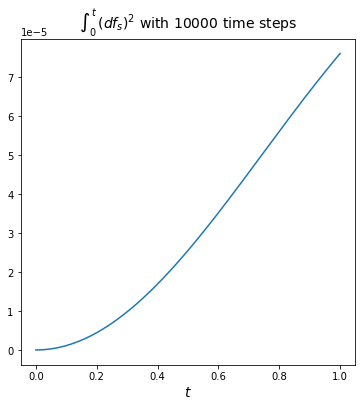

In [10]:
timesteps = 10000

plt.figure(figsize = (6,6))
plt.title('$\int_0^t\,(df_s)^2$ with {} time steps'.format(timesteps), fontsize = 14)
plt.xlabel('$t$', fontsize = 14)

plt.plot(*integral_df_squared(T = 1, timesteps = timesteps))

plt.show()